## Data Cleansing

### Extract Non-BBG Data

In [23]:
#SiCheng main dataframe
import pandas as pd
import openpyxl

raw_df_sc = pd.read_excel('main_dataset_raw.xlsx',sheet_name='data')
raw_df_sc

,DATE,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
0,1914-01,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914-02,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914-03,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914-04,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1914-05,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2024-08,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
1328,2024-09,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
1329,2024-10,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243
1330,2024-11,8.417,0.1,NaN,1.958417,1.25,NaN,-16.183557,9.254420,0.026150,NaN,NaN,NaN,-0.234083


## <font color="yellow">BBG Dataset</font>

### _Step 1: Read Excel, Modify Columns and Index_

In [24]:
#Alfred Dataset
#Main, GC2 data, Fed_Eff_Rate, PE; fix index and column labels

raw_df_al_main = pd.read_excel('bbg_gc_data.xlsx',sheet_name='Data')
raw_df_al_gc2 = pd.read_excel('bbg_gc_data.xlsx',sheet_name='GC2 COMB COMDTY',skiprows=6)
raw_df_al_fed_eff_rate = pd.read_excel('bbg_gc_data.xlsx',sheet_name='Fed_Eff_Rate',skiprows=5)
raw_df_al_pe = pd.read_excel('bbg_gc_data.xlsx',sheet_name='PE',skiprows=6)

#another file
raw_df_al_dp12 = pd.read_excel('data2.xlsx',sheet_name='DP_12M',skiprows=6)
raw_df_al_gdp_nom_yoy = pd.read_excel('data2.xlsx',sheet_name='GDP_Nom_YoY',skiprows=5) #quarterly
raw_df_al_gdp_real_qoq = pd.read_excel('data2.xlsx',sheet_name='GDP_Real_QoQ',skiprows=5) #quarterly
raw_df_al_cpi_yoy = pd.read_excel('data2.xlsx',sheet_name='CPI_YoY',skiprows=5) #monthly
raw_df_al_unemploy = pd.read_excel('data2.xlsx',sheet_name='US_Unemp',skiprows=5) #monthly
raw_df_al_consumer_conf = pd.read_excel('data2.xlsx',sheet_name='Cons_Conf',skiprows=5) #monthly
raw_df_al_real_int = pd.read_excel('data2.xlsx',sheet_name='US_RIR',skiprows=5) #monthly



#tidy up dataset
raw_df_al_list = [raw_df_al_main, 
                  raw_df_al_gc2, 
                  raw_df_al_fed_eff_rate, 
                  raw_df_al_pe,
                  raw_df_al_dp12,
                  raw_df_al_gdp_nom_yoy,
                  raw_df_al_gdp_real_qoq,
                  raw_df_al_unemploy,
                  raw_df_al_cpi_yoy,
                  raw_df_al_consumer_conf,
                  raw_df_al_real_int]

for df in raw_df_al_list:
    df.set_index(df.columns[0], inplace= True)

print(raw_df_al_gc2.columns)

raw_df_al_gc2.columns = ['GC2_PX_Last', 'GC2_OPEN_INT']
raw_df_al_fed_eff_rate.columns = ['fed_eff_rate']
raw_df_al_pe.columns = ['PE_RATIO']

raw_df_al_pe = raw_df_al_pe.drop('2025-02-06')
raw_df_al_main = raw_df_al_main.drop('2025-02-06')
raw_df_al_dp12 = raw_df_al_dp12.drop(['2025-02-07','2025-02-06'])
raw_df_al_dp12 = raw_df_al_dp12.drop('PX_LAST', axis = 1)
raw_df_al_dp12


Index(['PX_LAST', 'OPEN_INT'], dtype='object')


,EQY_DVD_YLD_12M
Date,
2025-02-05,1.2402
2025-02-04,1.2446
2025-02-03,1.2536
2025-01-31,1.2438
2025-01-30,1.2368
...,...
1975-01-07,NaN
1975-01-06,NaN
1975-01-03,NaN


In [25]:
"""check dataframe"""
#raw_df_al_gc2
#raw_df_al_fed_eff_rate.index[0]
#raw_df_al_pe
#raw_df_al_main
# raw_df_al_dp12
print(raw_df_al_gdp_nom_yoy.columns[0])


col_name_2 = {'D/P Ratio':raw_df_al_dp12,
            'GDP_Nominoal_YOY':raw_df_al_gdp_nom_yoy,
             'GDP_Real_QoQ':raw_df_al_gdp_real_qoq, 
             'CPI_YoY':raw_df_al_cpi_yoy, 
             'US_Unemp': raw_df_al_unemploy, 
             'Cons_Conf': raw_df_al_consumer_conf, 
             'US_RIR':raw_df_al_real_int}


for key, value in col_name_2.items():
    value.rename(columns={value.columns[0]:key},inplace=True)

#raw_df_al_dp12
#print(raw_df_al_gdp_nom_yoy, raw_df_al_gdp_real_qoq, raw_df_al_cpi_yoy, raw_df_al_consumer_conf, raw_df_al_real_int,raw_df_al_unemploy)
raw_df_al_main


PX_LAST


,GC1 COMB Comdty (USD) (R1),GC1 COMB Comdty (USD)_Open Interest,OI_SMAVG (15),GC1 COMB Comdty _Volume,Vol_SMAVG (15),SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,CPI YOY Index,PCE CYOY Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index
Date,,,,,,,,,,,,,,,,
2025-02-05,2871.600098,12629.0,157762.0,4519.0,129947.0,6061.479980,21658.160156,107.579,4.4181,4.1868,NaN,NaN,15.77,152.61,470.0811,1267.883057
2025-02-04,2853.300049,15937.0,175749.0,2187.0,141606.0,6037.879883,21566.919922,107.960,4.5105,4.2137,NaN,NaN,17.21,154.34,467.1318,1262.345947
2025-02-03,2833.899902,19918.0,193900.0,2649.0,155534.0,5994.569824,21297.580078,108.990,4.5550,4.2489,NaN,NaN,18.62,154.73,465.7805,1260.921997
2025-01-31,2812.500000,29715.0,212825.0,3443.0,175251.0,6040.529785,21478.050781,108.370,4.5387,4.1971,NaN,NaN,16.43,155.19,466.0748,1261.416016
2025-01-30,2823.000000,59296.0,231695.0,40141.0,185464.0,6071.169922,21508.119141,107.797,4.5163,4.2073,NaN,NaN,15.84,154.29,466.8466,1262.191040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974-03-14,NaN,NaN,NaN,NaN,NaN,99.650002,NaN,102.340,7.1320,NaN,NaN,NaN,NaN,282.89,NaN,NaN
1974-03-13,NaN,NaN,NaN,NaN,NaN,99.739998,NaN,101.990,7.1320,NaN,NaN,NaN,NaN,282.33,NaN,NaN
1974-03-12,NaN,NaN,NaN,NaN,NaN,99.150002,NaN,102.050,7.0920,NaN,NaN,NaN,NaN,281.69,NaN,NaN


### _Step 2: Format Dataframe_

#### 2.1 Join Dataframe and Unify Time Duration (50 years)

In [26]:
bbg_df = raw_df_al_main.drop(raw_df_al_main.columns[2:5],axis=1)

join_list = [raw_df_al_gc2, raw_df_al_pe , raw_df_al_fed_eff_rate]

for key, value in col_name_2.items():
    join_list.append(value)


bbg_df = bbg_df.join(join_list, how='left')

threshold_date = pd.Timestamp('1975-01-01')
bbg_df = bbg_df[bbg_df.index > threshold_date]
mapping = {bbg_df.columns[0]:'GC1_PX_Last',bbg_df.columns[1]:'GC1_OPEN_INT'}
bbg_df.rename(columns=mapping, inplace=True)
col = bbg_df.pop('GC2_PX_Last')
bbg_df.insert(1,'GC2_PX_Last',col)
# Sort by index (ascending order)
bbg_df = bbg_df.sort_index(ascending=True)
bbg_df


,GC1_PX_Last,GC2_PX_Last,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,CPI YOY Index,PCE CYOY Index,...,GC2_OPEN_INT,PE_RATIO,fed_eff_rate,D/P Ratio,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-02,175.100006,178.2,NaN,70.230003,NaN,97.710,7.4220,NaN,NaN,NaN,...,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-03,174.699997,177.5,NaN,70.709999,NaN,97.170,7.4320,NaN,NaN,NaN,...,NaN,NaN,8.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-06,174.399994,176.8,NaN,71.070000,NaN,96.620,7.3920,NaN,NaN,NaN,...,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-07,173.399994,175.8,NaN,71.019997,NaN,96.640,7.3820,NaN,NaN,NaN,...,NaN,NaN,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-08,177.399994,180.4,NaN,70.040001,NaN,97.140,7.3920,NaN,NaN,NaN,...,NaN,NaN,5.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,2823.000000,2845.2,59296.0,6071.169922,21508.119141,107.797,4.5163,4.2073,NaN,NaN,...,401677.0,27.3702,4.33,1.2368,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-31,2812.500000,2835.0,29715.0,6040.529785,21478.050781,108.370,4.5387,4.1971,NaN,NaN,...,404538.0,27.2321,4.33,1.2438,NaN,NaN,NaN,NaN,71.1,1.4869
2025-02-03,2833.899902,2857.1,19918.0,5994.569824,21297.580078,108.990,4.5550,4.2489,NaN,NaN,...,406285.0,27.0249,4.33,1.2536,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2 Calculate volatility

In [27]:
import numpy as np
import pandas as pd

# Compute δ so that the sum of weights equals 60 days
delta = 60 / (60 + 1)  # δ = 60 / (60 + 1)

# Ensure Date is in datetime format and sorted
bbg_df.index = pd.to_datetime(bbg_df.index, format='%Y-%m-%d')
bbg_df = bbg_df.sort_index()

# Compute daily log returns for the first and second columns
log_returns = pd.DataFrame(index=bbg_df.index)
log_returns['GC1_log_return'] = np.log(bbg_df.iloc[:, 0] / bbg_df.iloc[:, 0].shift(1))
log_returns['GC2_log_return'] = np.log(bbg_df.iloc[:, 1] / bbg_df.iloc[:, 1].shift(1))

# Compute EWMA variance for GC1 and GC2 --> agreed approach
variance = pd.DataFrame(index=bbg_df.index)
variance['GC1_variance'] = log_returns['GC1_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()
variance['GC2_variance'] = log_returns['GC2_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()

# Mask variance before 60 days to NaN
variance.loc[:bbg_df.index[60], ['GC1_variance', 'GC2_variance']] = np.nan

# Compute annualized volatility (square root of variance * 261)
volatility = pd.DataFrame(index=bbg_df.index)
volatility['GC1_volatility'] = np.sqrt(261 * variance['GC1_variance'])
volatility['GC2_volatility'] = np.sqrt(261 * variance['GC2_variance'])

volatility.to_csv('volatility.csv')


### _Step 3: Create Different Duration Dataframe_

#### <font color="yellow">3.1 BBG Dataframe by Month</font>

##### **<font color= #90EE90>3.1.1 Fill Nan</font>**

In [28]:
bbg_df = bbg_df.copy(deep=True)

print("Checking NaN in GC2 and GC1 before modification.......")
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])


bbg_df['GC2_PX_Last'] = bbg_df['GC2_PX_Last'].fillna(method = 'ffill' )
bbg_df['GC1_PX_Last'] = bbg_df['GC1_PX_Last'].fillna(method = 'ffill' )

#checking
print("\nChecking any NaN left in GC2 .......")
print()
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])

print("\nChecking any NaN left in GC1 .......")
print()
print(bbg_df[bbg_df['GC1_PX_Last'].isna()])

print("\nChecking 2025-01-01 .......")
print(bbg_df.loc['2025-01-01'])




Checking NaN in GC2 and GC1 before modification.......
            GC1_PX_Last  GC2_PX_Last  GC1_OPEN_INT  SPX Index  NDX Index  \
Date                                                                       
1975-02-12          NaN          NaN           NaN  79.919998        NaN   
1975-02-17          NaN          NaN           NaN        NaN        NaN   
1975-03-28          NaN          NaN           NaN        NaN        NaN   
1975-05-26          NaN          NaN           NaN        NaN        NaN   
1975-05-31          NaN          NaN           NaN        NaN        NaN   
...                 ...          ...           ...        ...        ...   
2024-11-28          NaN          NaN           NaN        NaN        NaN   
2024-11-30          NaN          NaN           NaN        NaN        NaN   
2024-12-25          NaN          NaN           NaN        NaN        NaN   
2025-01-01          NaN          NaN           NaN        NaN        NaN   
2025-01-20          NaN          

/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/719186004.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bbg_df['GC2_PX_Last'] = bbg_df['GC2_PX_Last'].fillna(method = 'ffill' )
/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/719186004.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bbg_df['GC1_PX_Last'] = bbg_df['GC1_PX_Last'].fillna(method = 'ffill' )


In [29]:
# Define the columns to keep with original values
keep_columns = [
    "CPI YOY Index", "PCE CYOY Index", "GDP_Nominoal_YOY", "GDP_Real_QoQ",
    "CPI_YoY", "US_Unemp", "Cons_Conf", "US_RIR"
]

# Calculate log returns for all columns except those in keep_columns
log_return_df = np.log(bbg_df.drop(columns=keep_columns, errors='ignore')).diff()

# Combine the original values of the specified columns with the log returns of the remaining columns
bbg_df_log_rets = pd.concat([ log_return_df,bbg_df[keep_columns]], axis=1)
bbg_df_log_rets = bbg_df_log_rets.iloc[1:]
bbg_df_log_rets = bbg_df_log_rets.rename(columns={'GC1_PX_Last': 'GC1_Monthly_Return','GC2_PX_Last': 'GC2_Monthly_Return'})
bbg_df_log_rets

,GC1_Monthly_Return,GC2_Monthly_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,fed_eff_rate,D/P Ratio,CPI YOY Index,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-03,-0.002287,-0.003936,NaN,0.006811,NaN,-0.005542,0.001346,NaN,NaN,0.000599,...,-0.021277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-06,-0.001719,-0.003951,NaN,0.005078,NaN,-0.005676,-0.005397,NaN,NaN,0.000598,...,-0.064140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-07,-0.005750,-0.005672,NaN,-0.000704,NaN,0.000207,-0.001354,NaN,NaN,-0.000299,...,-0.072639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-08,0.022806,0.025830,NaN,-0.013895,NaN,0.005161,0.001354,NaN,NaN,-0.000598,...,-0.354720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-09,0.005061,0.002768,NaN,0.016005,NaN,-0.002061,-0.005426,NaN,NaN,0.000299,...,0.350602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,0.019025,0.018338,-0.270892,0.005262,0.004504,-0.001881,-0.002676,-0.001473,-0.044452,-0.006010,...,0.000000,-0.005483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-31,-0.003726,-0.003591,-0.690890,-0.005060,-0.001399,0.005301,0.004948,-0.002427,0.036571,0.005816,...,0.000000,0.005644,NaN,NaN,NaN,NaN,NaN,NaN,71.1,1.4869
2025-02-03,0.007580,0.007765,-0.400028,-0.007638,-0.008438,0.005705,0.003585,0.012266,0.125127,-0.002969,...,0.000000,0.007848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **<font color= #90EE90>3.1.2 Resample to Month</font>**

In [30]:
#when resampling, sum up the return in months to get monthly_ret (from 1st day to last day of month)
bbg_df_monthly_only = bbg_df_log_rets.resample('M').sum(min_count=1)
bbg_df_monthly_only = bbg_df_monthly_only.iloc[:-2] #until 2024-12-31

# Compute monthly mean volatility (AC: agreed approach: monthly mean of the annualized vol)
volatility_monthly = volatility.resample('M').mean()

# Merge with bbg_df_monthly_only, keeping all indices from bbg_df_monthly_only
bbg_df_monthly_only = bbg_df_monthly_only.merge(volatility_monthly, how='left', left_index=True, right_index=True)
bbg_df_monthly_only


/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/1378979760.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bbg_df_monthly_only = bbg_df_log_rets.resample('M').sum(min_count=1)
/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/1378979760.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  volatility_monthly = volatility.resample('M').mean()


,GC1_Monthly_Return,GC2_Monthly_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,CPI YOY Index,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,GC1_volatility,GC2_volatility
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,...,11.8,10.14168,NaN,NaN,11.8,8.1,NaN,-4.8026,NaN,NaN
1975-02-28,0.041847,0.043425,NaN,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,...,11.2,10.21999,NaN,NaN,11.2,8.1,NaN,-5.2288,NaN,NaN
1975-03-31,-0.032772,-0.035034,NaN,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,...,10.3,9.93721,8.4,-4.7,10.3,8.6,NaN,-4.7510,0.162229,0.161182
1975-04-30,-0.059919,-0.060868,NaN,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,...,10.2,9.65292,NaN,NaN,10.2,8.8,NaN,-4.9583,0.171430,0.172165
1975-05-31,-0.001800,0.000592,NaN,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,...,9.5,9.07047,NaN,NaN,9.5,9.0,NaN,-4.2150,0.176185,0.181025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,1.334165,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,...,2.5,2.73112,NaN,NaN,2.5,4.2,67.9,2.8443,0.168238,0.169387
2024-09-30,0.051211,0.050830,-2.773346,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,...,2.4,2.66078,5.0,3.1,2.4,4.1,70.1,2.4344,0.151431,0.154221
2024-10-31,0.042046,0.042190,5.034246,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,...,2.6,2.80366,NaN,NaN,2.6,4.1,70.5,2.2771,0.134111,0.135932


##### **<font color= #90EE90>3.1.3 Create Time Series Momentum Data</font>**

In [31]:
# bbg_df_monthly_only['GC2_Monthly_Return'] = bbg_df_monthly_only['GC2_PX_Last'].pct_change()
# bbg_df_monthly_only['GC1_Monthly_Return'] = bbg_df_monthly_only['GC1_PX_Last'].pct_change()
# col = bbg_df_monthly_only.pop('GC2_Monthly_Return')
# bbg_df_monthly_only.insert(2,'GC2_Monthly_Return',col)
# col = bbg_df_monthly_only.pop('GC1_Monthly_Return')
# bbg_df_monthly_only.insert(1,'GC1_Monthly_Return',col)
# bbg_df_monthly_only

In [32]:
# 1M sign (unchanged)
bbg_df_monthly_only['GC2_1M_Sign'] = np.sign(bbg_df_monthly_only['GC2_Monthly_Return'])
bbg_df_monthly_only['GC1_1M_Sign'] = np.sign(bbg_df_monthly_only['GC1_Monthly_Return'])

# 3M return (log return accumulates by summation)
bbg_df_monthly_only['GC2_3M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=3)
    .sum()
)
bbg_df_monthly_only['GC1_3M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=3)
    .sum()
)

# Calculate 3M sign
bbg_df_monthly_only['GC2_3M_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Ret'])
bbg_df_monthly_only['GC1_3M_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Ret'])

# 6M return (log return accumulates by summation)
bbg_df_monthly_only['GC2_6M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=6)
    .sum()
)
bbg_df_monthly_only['GC1_6M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=6)
    .sum()
)
# Calculate 3M sign
bbg_df_monthly_only['GC2_6M_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Ret'])
bbg_df_monthly_only['GC1_6M_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Ret'])

# 6M return (log return accumulates by summation)
bbg_df_monthly_only['GC2_12M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=12)
    .sum()
)
bbg_df_monthly_only['GC1_12M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=12)
    .sum()
)

# Calculate 6M sign
bbg_df_monthly_only['GC2_12M_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Ret'])
bbg_df_monthly_only['GC1_12M_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Ret'])


#checking log return
bbg_df_monthly_only[['GC2_Monthly_Return','GC2_12M_Ret','GC2_6M_Ret','GC2_3M_Ret']].head(24)
#bbg_df_monthly_only


,GC2_Monthly_Return,GC2_12M_Ret,GC2_6M_Ret,GC2_3M_Ret
Date,,,,
1975-01-31,-0.001123,NaN,NaN,NaN
1975-02-28,0.043425,NaN,NaN,NaN
1975-03-31,-0.035034,NaN,NaN,0.007269
1975-04-30,-0.060868,NaN,NaN,-0.052477
1975-05-31,0.000592,NaN,NaN,-0.095310
1975-06-30,0.008250,NaN,-0.044758,-0.052027
1975-07-31,0.000587,NaN,-0.043048,0.009428
1975-08-31,-0.046213,NaN,-0.132686,-0.037376
1975-09-30,-0.135288,NaN,-0.232941,-0.180914


In [33]:
# Calculate 1M sign
bbg_df_monthly_only['GC2_1M_Sign'] = np.sign(bbg_df_monthly_only['GC2_Monthly_Return'])
bbg_df_monthly_only['GC1_1M_Sign'] = np.sign(bbg_df_monthly_only['GC1_Monthly_Return'])

# ===== Calculate Actual Return in Forward-Looking Next X Month Return =====

# Forward-looking 3M return
bbg_df_monthly_only['GC2_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)  # forward-looking return
)
bbg_df_monthly_only['GC1_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)
)
# 3M forward sign
bbg_df_monthly_only['GC2_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Fwd_Ret'])
bbg_df_monthly_only['GC1_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Fwd_Ret'])


# Forward-looking 6M return
bbg_df_monthly_only['GC2_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)
bbg_df_monthly_only['GC1_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)
# 6M forward sign
bbg_df_monthly_only['GC2_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Fwd_Ret'])
bbg_df_monthly_only['GC1_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Fwd_Ret'])


# Forward-looking 12M return
bbg_df_monthly_only['GC2_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)
bbg_df_monthly_only['GC1_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)
# 12M forward sign
bbg_df_monthly_only['GC2_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Fwd_Ret'])
bbg_df_monthly_only['GC1_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Fwd_Ret'])


bbg_df_monthly_only[['GC1_3M_Fwd_Ret','GC1_3M_Ret','GC1_12M_Fwd_Ret','GC1_12M_Ret']].head(20)


,GC1_3M_Fwd_Ret,GC1_3M_Ret,GC1_12M_Fwd_Ret,GC1_12M_Ret
Date,,,,
1975-01-31,0.011357,NaN,-0.216597,NaN
1975-02-28,-0.050844,NaN,-0.314048,NaN
1975-03-31,-0.094491,0.011357,-0.322149,NaN
1975-04-30,-0.053942,-0.050844,-0.316127,NaN
1975-05-31,0.004785,-0.094491,-0.257759,NaN
1975-06-30,-0.038572,-0.053942,-0.278713,NaN
1975-07-31,-0.177565,0.004785,-0.303298,NaN
1975-08-31,-0.160135,-0.038572,-0.402189,NaN
1975-09-30,-0.154255,-0.177565,-0.443638,NaN


In [34]:
#checking Next X month Return
bbg_df_monthly_only[['GC2_12M_Fwd_Ret','GC1_Monthly_Return']]

,GC2_12M_Fwd_Ret,GC1_Monthly_Return
Date,,
1975-01-31,-0.224969,0.002282
1975-02-28,-0.321971,0.041847
1975-03-31,-0.334860,-0.032772
1975-04-30,-0.324951,-0.059919
1975-05-31,-0.261003,-0.001800
...,...,...
2024-08-31,NaN,0.031639
2024-09-30,NaN,0.051211
2024-10-31,NaN,0.042046


In [35]:
#Reorder columns

new_order_part1 = list(bbg_df_monthly_only.columns[0:2]) + [
    'GC1_volatility', 'GC2_volatility', 'GC2_OPEN_INT',
    'GC2_1M_Sign', 'GC1_1M_Sign', 'GC2_3M_Ret', 'GC1_3M_Ret',
    'GC2_3M_Sign', 'GC1_3M_Sign', 'GC2_6M_Ret', 'GC1_6M_Ret',
    'GC2_6M_Sign', 'GC1_6M_Sign', 'GC2_12M_Ret', 'GC1_12M_Ret',
    'GC2_12M_Sign', 'GC1_12M_Sign'
]

new_forward_looking_cols = [
    'GC2_3M_Fwd_Ret', 'GC1_3M_Fwd_Ret', 'GC2_3M_Fwd_Sign', 'GC1_3M_Fwd_Sign',
    'GC2_6M_Fwd_Ret', 'GC1_6M_Fwd_Ret', 'GC2_6M_Fwd_Sign', 'GC1_6M_Fwd_Sign',
    'GC2_12M_Fwd_Ret', 'GC1_12M_Fwd_Ret', 'GC2_12M_Fwd_Sign', 'GC1_12M_Fwd_Sign'
]

final_column_order = new_order_part1 + new_forward_looking_cols

new_order = final_column_order + [col for col in bbg_df_monthly_only.columns if col not in final_column_order]
bbg_df_by_month = bbg_df_monthly_only.loc[:,new_order]
bbg_df_by_month

,GC1_Monthly_Return,GC2_Monthly_Return,GC1_volatility,GC2_volatility,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,fed_eff_rate,D/P Ratio,CPI YOY Index,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,...,-0.234908,NaN,11.8,10.14168,NaN,NaN,11.8,8.1,NaN,-4.8026
1975-02-28,0.041847,0.043425,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,-0.107664,NaN,11.2,10.21999,NaN,NaN,11.2,8.1,NaN,-5.2288
1975-03-31,-0.032772,-0.035034,0.162229,0.161182,NaN,-1.0,-1.0,0.007269,0.011357,1.0,...,-0.118813,NaN,10.3,9.93721,8.4,-4.7,10.3,8.6,NaN,-4.7510
1975-04-30,-0.059919,-0.060868,0.171430,0.172165,NaN,-1.0,-1.0,-0.052477,-0.050844,-1.0,...,0.265641,NaN,10.2,9.65292,NaN,NaN,10.2,8.8,NaN,-4.9583
1975-05-31,-0.001800,0.000592,0.176185,0.181025,NaN,1.0,-1.0,-0.095310,-0.094491,-1.0,...,-0.295775,NaN,9.5,9.07047,NaN,NaN,9.5,9.0,NaN,-4.2150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.168238,0.169387,2.030054,1.0,1.0,0.074644,0.075273,1.0,...,0.000000,-0.016416,2.5,2.73112,NaN,NaN,2.5,4.2,67.9,2.8443
2024-09-30,0.051211,0.050830,0.151431,0.154221,0.095934,1.0,1.0,0.118380,0.119321,1.0,...,-0.098505,-0.036544,2.4,2.66078,5.0,3.1,2.4,4.1,70.1,2.4344
2024-10-31,0.042046,0.042190,0.134111,0.135932,-1.598552,1.0,1.0,0.124488,0.124896,1.0,...,0.000000,0.019896,2.6,2.80366,NaN,NaN,2.6,4.1,70.5,2.2771


##### **<font color= #90EE90>3.1.4 Modify Non BBG Dataset</font>**

In [36]:
#Before change
#print(raw_df_sc.iloc[:,0])

#After change
raw_df_sc['DATE'] = pd.to_datetime(raw_df_sc['DATE'], format='%Y-%m') + pd.offsets.MonthEnd(0)

raw_df_sc.set_index(raw_df_sc.columns[0],inplace = True)

raw_df_sc

,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
DATE,,,,,,,,,,,,,
1914-01-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-02-28,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-03-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-04-30,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-05-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
2024-09-30,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
2024-10-31,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243


In [37]:
#Join with BBG Dataframe

selected_cols = ['ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount', 'PPI']

partial_df_sc = raw_df_sc[selected_cols]

print(partial_df_sc)
partial_df_sc.index

            ETF_Ounces  Chinese_premium_discount  Indian_premium_discount  PPI
DATE                                                                          
1914-01-31         NaN                       NaN                      NaN -2.5
1914-02-28         NaN                       NaN                      NaN -1.7
1914-03-31         NaN                       NaN                      NaN -2.5
1914-04-30         NaN                       NaN                      NaN -2.5
1914-05-31         NaN                       NaN                      NaN -2.5
...                ...                       ...                      ...  ...
2024-08-31         NaN                 -1.526427                 5.831219 -0.9
2024-09-30         NaN                -11.192383                -2.388517 -2.4
2024-10-31         NaN                -13.455145                 0.537662 -0.9
2024-11-30         NaN                -16.183557                 9.254420  0.1
2024-12-31         NaN                 -3.335864    

DatetimeIndex(['1914-01-31', '1914-02-28', '1914-03-31', '1914-04-30',
               '1914-05-31', '1914-06-30', '1914-07-31', '1914-08-31',
               '1914-09-30', '1914-10-31',
               ...
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1332, freq=None)

In [38]:
combined_df_by_month = bbg_df_by_month.join(partial_df_sc,how='left')
combined_df_by_month.index=pd.to_datetime(combined_df_by_month.index, format='%Y-%m')
combined_df_by_month['GDP_Nominoal_YOY'] = combined_df_by_month['GDP_Nominoal_YOY'].fillna(method = 'ffill' )
combined_df_by_month['GDP_Real_QoQ'] = combined_df_by_month['GDP_Real_QoQ'].fillna(method = 'ffill' )
combined_df_by_month

/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/2859612543.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df_by_month['GDP_Nominoal_YOY'] = combined_df_by_month['GDP_Nominoal_YOY'].fillna(method = 'ffill' )
/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/2859612543.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df_by_month['GDP_Real_QoQ'] = combined_df_by_month['GDP_Real_QoQ'].fillna(method = 'ffill' )


,GC1_Monthly_Return,GC2_Monthly_Return,GC1_volatility,GC2_volatility,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,11.8,8.1,NaN,-4.8026,NaN,NaN,NaN,17.1
1975-02-28,0.041847,0.043425,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,11.2,8.1,NaN,-5.2288,NaN,NaN,NaN,14.4
1975-03-31,-0.032772,-0.035034,0.162229,0.161182,NaN,-1.0,-1.0,0.007269,0.011357,1.0,...,8.4,-4.7,10.3,8.6,NaN,-4.7510,NaN,NaN,NaN,12.5
1975-04-30,-0.059919,-0.060868,0.171430,0.172165,NaN,-1.0,-1.0,-0.052477,-0.050844,-1.0,...,8.4,-4.7,10.2,8.8,NaN,-4.9583,NaN,NaN,NaN,12.7
1975-05-31,-0.001800,0.000592,0.176185,0.181025,NaN,1.0,-1.0,-0.095310,-0.094491,-1.0,...,8.4,-4.7,9.5,9.0,NaN,-4.2150,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.168238,0.169387,2.030054,1.0,1.0,0.074644,0.075273,1.0,...,5.7,3.0,2.5,4.2,67.9,2.8443,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.051211,0.050830,0.151431,0.154221,0.095934,1.0,1.0,0.118380,0.119321,1.0,...,5.0,3.1,2.4,4.1,70.1,2.4344,NaN,-11.192383,-2.388517,-2.4
2024-10-31,0.042046,0.042190,0.134111,0.135932,-1.598552,1.0,1.0,0.124488,0.124896,1.0,...,5.0,3.1,2.6,4.1,70.5,2.2771,NaN,-13.455145,0.537662,-0.9


##### **<font color= #90EE90>3.1.5 Export Dataframe</font>**

In [39]:
combined_df_by_month.to_excel('combined_df_by_month.xlsx')

-------

### _Step 4: Build Model_

##### **<font color= #90EE90>4.1 Split dataframe into X and Y</font>** 

In [40]:
# Separate Gold Price Futures Data
import pandas as pd

gc_data = combined_df_by_month.iloc[:, :32]
x_variables_data = combined_df_by_month.iloc[:, 32:56]
gc_data

,GC1_Monthly_Return,GC2_Monthly_Return,GC1_volatility,GC2_volatility,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,GC1_3M_Fwd_Sign,GC2_6M_Fwd_Ret,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign,GC1_OPEN_INT
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,...,1.0,-0.044758,-0.042584,-1.0,-1.0,-0.224969,-0.216597,-1.0,-1.0,NaN
1975-02-28,0.041847,0.043425,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,-1.0,-0.043048,-0.046059,-1.0,-1.0,-0.321971,-0.314048,-1.0,-1.0,NaN
1975-03-31,-0.032772,-0.035034,0.162229,0.161182,NaN,-1.0,-1.0,0.007269,0.011357,1.0,...,-1.0,-0.132686,-0.133063,-1.0,-1.0,-0.334860,-0.322149,-1.0,-1.0,NaN
1975-04-30,-0.059919,-0.060868,0.171430,0.172165,NaN,-1.0,-1.0,-0.052477,-0.050844,-1.0,...,-1.0,-0.232941,-0.231507,-1.0,-1.0,-0.324951,-0.316127,-1.0,-1.0,NaN
1975-05-31,-0.001800,0.000592,0.176185,0.181025,NaN,1.0,-1.0,-0.095310,-0.094491,-1.0,...,1.0,-0.157412,-0.155350,-1.0,-1.0,-0.261003,-0.257759,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.168238,0.169387,2.030054,1.0,1.0,0.074644,0.075273,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.334165
2024-09-30,0.051211,0.050830,0.151431,0.154221,0.095934,1.0,1.0,0.118380,0.119321,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.773346
2024-10-31,0.042046,0.042190,0.134111,0.135932,-1.598552,1.0,1.0,0.124488,0.124896,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.034246


In [41]:
x_variables_data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,NaN,11.8,8.1,NaN,-4.8026,NaN,NaN,NaN,17.1
1975-02-28,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,NaN,11.2,8.1,NaN,-5.2288,NaN,NaN,NaN,14.4
1975-03-31,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,8.4,-4.7,10.3,8.6,NaN,-4.7510,NaN,NaN,NaN,12.5
1975-04-30,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,8.4,-4.7,10.2,8.8,NaN,-4.9583,NaN,NaN,NaN,12.7
1975-05-31,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,NaN,NaN,NaN,...,8.4,-4.7,9.5,9.0,NaN,-4.2150,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,5.7,3.0,2.5,4.2,67.9,2.8443,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,5.0,3.1,2.4,4.1,70.1,2.4344,NaN,-11.192383,-2.388517,-2.4
2024-10-31,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,-0.013816,-0.009846,...,5.0,3.1,2.6,4.1,70.5,2.2771,NaN,-13.455145,0.537662,-0.9


In [42]:
# Ensure required columns exist before calculation
required_cols = ['GC1_Monthly_Return', 'GC1_volatility', 'GC2_Monthly_Return', 'GC2_volatility']
missing_cols = [col for col in required_cols if col not in gc_data.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in gc_data: {missing_cols}")

# Compute Sharpe ratios and store in gc_data
gc_data['GC1_sharpe'] = gc_data['GC1_Monthly_Return']*12 / gc_data['GC1_volatility']
gc_data['GC2_sharpe'] = gc_data['GC2_Monthly_Return']*12 / gc_data['GC2_volatility']
gc_data

,GC1_Monthly_Return,GC2_Monthly_Return,GC1_volatility,GC2_volatility,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign,GC1_OPEN_INT,GC1_sharpe,GC2_sharpe
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,...,-0.042584,-1.0,-1.0,-0.224969,-0.216597,-1.0,-1.0,NaN,NaN,NaN
1975-02-28,0.041847,0.043425,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,-0.046059,-1.0,-1.0,-0.321971,-0.314048,-1.0,-1.0,NaN,NaN,NaN
1975-03-31,-0.032772,-0.035034,0.162229,0.161182,NaN,-1.0,-1.0,0.007269,0.011357,1.0,...,-0.133063,-1.0,-1.0,-0.334860,-0.322149,-1.0,-1.0,NaN,-2.424102,-2.608259
1975-04-30,-0.059919,-0.060868,0.171430,0.172165,NaN,-1.0,-1.0,-0.052477,-0.050844,-1.0,...,-0.231507,-1.0,-1.0,-0.324951,-0.316127,-1.0,-1.0,NaN,-4.194293,-4.242574
1975-05-31,-0.001800,0.000592,0.176185,0.181025,NaN,1.0,-1.0,-0.095310,-0.094491,-1.0,...,-0.155350,-1.0,-1.0,-0.261003,-0.257759,-1.0,-1.0,NaN,-0.122612,0.039236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.168238,0.169387,2.030054,1.0,1.0,0.074644,0.075273,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.334165,2.256742,2.229309
2024-09-30,0.051211,0.050830,0.151431,0.154221,0.095934,1.0,1.0,0.118380,0.119321,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.773346,4.058216,3.955127
2024-10-31,0.042046,0.042190,0.134111,0.135932,-1.598552,1.0,1.0,0.124488,0.124896,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.034246,3.762176,3.724499


In [43]:
# Consider lag in x regressors
x_variables_data=x_variables_data.shift(1)
x_variables_data["PCE CYOY Index"]=x_variables_data["PCE CYOY Index"].shift(1)
x_variables_data["GDP_Nominoal_YOY"]=x_variables_data["GDP_Nominoal_YOY"].shift(1)
x_variables_data["GDP_Real_QoQ"]=x_variables_data["GDP_Real_QoQ"].shift(1)
x_variables_data["CPI_YoY"]=x_variables_data["CPI_YoY"].shift(1)
x_variables_data["US_Unemp"]=x_variables_data["US_Unemp"].shift(1)
x_variables_data["PPI"]=x_variables_data["PPI"].shift(1)
x_variables_data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-4.8026,NaN,NaN,NaN,NaN
1975-03-31,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,NaN,11.8,8.1,NaN,-5.2288,NaN,NaN,NaN,17.1
1975-04-30,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,NaN,NaN,11.2,8.1,NaN,-4.7510,NaN,NaN,NaN,14.4
1975-05-31,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,8.4,-4.7,10.3,8.6,NaN,-4.9583,NaN,NaN,NaN,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.003152,-0.033085,-0.017191,-0.083178,-0.088641,0.291765,-0.073755,0.031744,0.023840,0.008580,...,5.7,3.0,3.0,4.1,66.4,2.4803,1.014021e+08,10.870681,-12.609224,0.8
2024-09-30,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,5.7,3.0,2.9,4.2,67.9,2.8443,NaN,-1.526427,5.831219,1.4
2024-10-31,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,5.7,3.0,2.5,4.2,70.1,2.4344,NaN,-11.192383,-2.388517,-0.9


##### **<font color= #90EE90>4.2 Train model</font>** 

##### Below is the code to run individual OLS regression on Y, already stopped to use, use LASSO instead

In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

# Ensure Date is datetime index
gc_data.index = pd.to_datetime(gc_data.index, format='%Y-%m')
x_variables_data.index = pd.to_datetime(x_variables_data.index, format='%Y-%m')

# Ensure both DataFrames are sorted by date
gc_data = gc_data.sort_index()
x_variables_data = x_variables_data.sort_index()

# Target variable 
y = gc_data['GC2_12M_Fwd_Ret'].dropna(how='all')

# Predictor variables (all columns from x_variables_data)
# Align predictor variables (X) to y's index
X = x_variables_data.copy().loc[y.index]  # Only keep rows where y has data

# Define number of folds
n_splits = 10  

# Dictionary to store statistics
t_values = {col: [] for col in X.columns}
p_values = {col: [] for col in X.columns}
significant_counts = {col: 0 for col in X.columns}
coefficients = {col: [] for col in X.columns}  # Store regression coefficients
r2_values = {col: [] for col in X.columns}  # Store R² values

# Iterate over each feature independently
for feature in X.columns:
    # Extract the specific feature column
    X_feature = X[[feature]].dropna()  # Remove NaNs for this feature

    # Align y with available X data
    y_feature = y.loc[X_feature.index]

    # Ensure at least `n_splits` * 2 data points exist
    if len(X_feature) < n_splits * 2:
        continue  # Skip this feature if not enough data points

    # Define rolling window TimeSeriesSplit only for this feature's data range
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Perform rolling window time series validation
    for train_idx, test_idx in tscv.split(X_feature):
        X_train, X_test = X_feature.iloc[train_idx], X_feature.iloc[test_idx]
        y_train, y_test = y_feature.iloc[train_idx], y_feature.iloc[test_idx]

        # Skip if no valid training data
        if len(X_train) == 0 or len(y_train) == 0:
            continue

        # Add intercept term
        X_train_with_const = sm.add_constant(X_train)

        # Fit OLS model
        model = sm.OLS(y_train, X_train_with_const).fit()

        # Extract regression results
        coef = model.params[feature]
        t_stat = model.tvalues[feature]
        p_value = model.pvalues[feature]
        r2 = model.rsquared

        # Store results
        coefficients[feature].append(coef)
        t_values[feature].append(t_stat)
        p_values[feature].append(p_value)
        r2_values[feature].append(r2)

        # If p-value < 0.05/len(X.columns), count as significant
        if p_value < (0.05):  # Bonferroni correction
            significant_counts[feature] += 1

# Create a DataFrame to store regression results
t_test_results = pd.DataFrame({
    "Mean_t_value": {col: np.nanmean(np.abs(t_values[col])) for col in X.columns},  # Mean t-value
    "Mean_p_value": {col: np.nanmean(p_values[col]) for col in X.columns},  # Mean p-value
    "Significant_fold_count": significant_counts,  # Count of significant folds
    "Mean_coefficient": {col: np.nanmean(coefficients[col]) for col in X.columns},  # Mean coefficient
    "Mean_R2": {col: np.nanmean(r2_values[col]) for col in X.columns}  # Mean R² value
})

# Sort by significance count
t_test_results = t_test_results.sort_values(by="Significant_fold_count", ascending=False)
t_test_results



,Mean_t_value,Mean_p_value,Significant_fold_count,Mean_coefficient,Mean_R2
GDP_Nominoal_YOY,5.608691,0.003169,10,3.939513e-02,0.164108
ETF_Ounces,5.238297,0.070031,9,2.504749e-09,0.210389
Cons_Conf,2.921037,0.061878,8,-2.344338e-03,0.031919
US_RIR,3.299272,0.032771,7,4.267385e-03,0.078605
US_Unemp,4.206441,0.050813,7,-6.928159e-02,0.136942
VIX Index,1.546135,0.227281,5,-8.008671e-02,0.031377
Indian_premium_discount,1.531814,0.267464,4,-1.151237e-03,0.065938
Chinese_premium_discount,1.773974,0.300206,4,-1.382249e-03,0.031296
PCE CYOY Index,1.579100,0.283532,2,-2.698378e-02,0.036393
DXY Curncy,1.590984,0.145012,1,-1.086256e+00,0.010634


##### Placeholder: This is to find out which variables is significant, stopped to use as well

In [45]:
# Get the list of significant column names from t_test_results
significant_columns = t_test_results.loc[t_test_results['Significant_fold_count'] >= 1].index.tolist()

# Keep only the columns in x_variables_data that match the significant columns
filtered_x_variables_data = x_variables_data[significant_columns]
# Fill NaN values with 0
filtered_x_variables_data = filtered_x_variables_data.fillna(0)
filtered_x_variables_data

,GDP_Nominoal_YOY,ETF_Ounces,Cons_Conf,US_RIR,US_Unemp,VIX Index,Indian_premium_discount,Chinese_premium_discount,PCE CYOY Index,DXY Curncy,fed_eff_rate
Date,,,,,,,,,,,
1975-01-31,0.0,0.000000e+00,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1975-02-28,0.0,0.000000e+00,0.0,-4.8026,0.0,0.000000,0.000000,0.000000,0.00000,-0.021726,-0.234908
1975-03-31,0.0,0.000000e+00,0.0,-5.2288,8.1,0.000000,0.000000,0.000000,10.14168,-0.019899,-0.107664
1975-04-30,0.0,0.000000e+00,0.0,-4.7510,8.1,0.000000,0.000000,0.000000,10.21999,0.019908,-0.118813
1975-05-31,8.4,0.000000e+00,0.0,-4.9583,8.6,0.000000,0.000000,0.000000,9.93721,0.005993,0.265641
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,5.7,1.014021e+08,66.4,2.4803,4.1,0.291765,-12.609224,10.870681,2.63048,-0.017191,0.000000
2024-09-30,5.7,0.000000e+00,67.9,2.8443,4.2,-0.086789,5.831219,-1.526427,2.66530,-0.023306,0.000000
2024-10-31,5.7,0.000000e+00,70.1,2.4344,4.2,0.073143,-2.388517,-11.192383,2.73112,-0.008635,-0.098505


#### Below is an OLS regression for all the Xs against Y, stopped to use as well

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

# Target variable
y = gc_data['GC1_12M_Fwd_Ret'].dropna(how='all')
# Predictor variables
X = filtered_x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  # Add intercept term

n_splits = 10  

# Store model summaries
model_summaries = []

if len(X) >= n_splits * 2:
    tscv = TimeSeriesSplit(n_splits=n_splits)
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Fit OLS regression model
        model = sm.OLS(y_train, X_train).fit()

        # Store model summary
        model_summaries.append(model.summary())

# Print the summary for the last fold (for inspection)
if model_summaries:
    print(model_summaries[-1])  # Output last model summary
else:
    print("No valid models were fitted.")


                            OLS Regression Results                            
Dep. Variable:        GC1_12M_Fwd_Ret   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     6.050
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           2.37e-09
Time:                        15:42:07   Log-Likelihood:                 121.52
No. Observations:                 536   AIC:                            -219.0
Df Residuals:                     524   BIC:                            -167.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##### **<font color= #90EE90>4.3 Regularization</font>** 

##### **[IN USE] LASSO regression - To find all the variable that is useful**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.009e-05, tolerance: 4.955e-06
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.076e-05, tolerance: 4.955e-06
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

LASSO Selected Features and Coefficients (Averaged Across Folds):
const                       0.000000
SPX Index                   0.002646
NDX Index                   0.000000
DXY Curncy                  0.000000
USGG10YR Index              0.000000
USGG2YR Index               0.000000
VIX Index                   0.000000
JPY Curncy                  0.000000
LEGATRUU Index              0.000000
EMUSTRUU Index              0.000000
PE_RATIO                    0.000000
fed_eff_rate                0.000000
D/P Ratio                   0.000000
CPI YOY Index               0.000081
PCE CYOY Index              0.000000
GDP_Nominoal_YOY            0.002207
GDP_Real_QoQ               -0.002111
CPI_YoY                     0.003354
US_Unemp                   -0.003435
Cons_Conf                   0.000000
US_RIR                      0.008846
ETF_Ounces                  0.000000
Chinese_premium_discount    0.000000
Indian_premium_discount     0.000000
PPI                         0.000000
dtype: fl

/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/4215835341.py:98: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  forecast_error = float(y_test - y_pred)
/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/4215835341.py:104: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  historical_mean_error = float(y_test - y_historical_mean.mean()*data_period)
/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/4215835341.py:98: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  forecast_error = float(y_test - y_pred)
/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/4215835341.py:104: FutureWarning: Calling float on a single element Series is deprecated and 

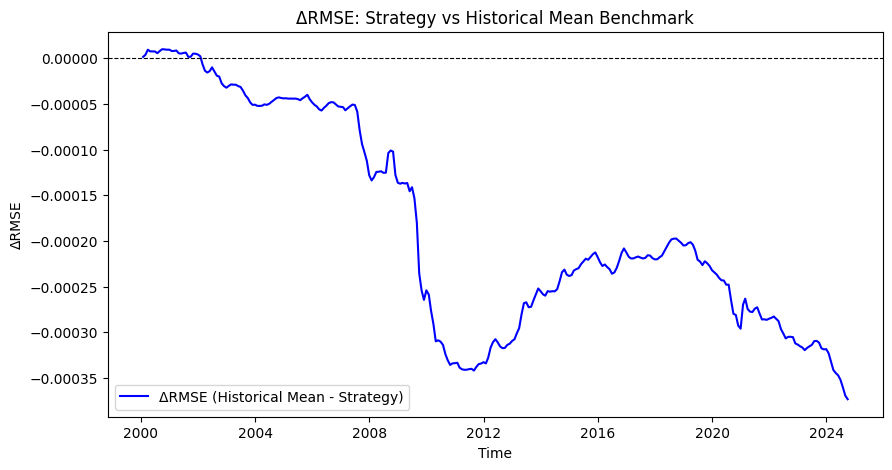

In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Target variable
y = gc_data['GC1_3M_Fwd_Ret'].dropna(how='all')
#y = gc_data['GC1_Monthly_Return'].dropna(how='all')


y_historical_mean_data=gc_data['GC1_Monthly_Return'].dropna(how='all')
data_period=6
# Predictor variable
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept

# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

# Cross Validation
if len(X_scaled) >= n_splits * 2:
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Record the regression statistics for each fold of CV - 记录每个折叠的回归系数
    lasso_coefficients = []

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Use LASSO CV to choose the best alpha option - 使用 LASSO 交叉验证选择最佳 alpha
        lasso_cv = LassoCV(cv=tscv, random_state=42).fit(X_train, y_train)
        best_alpha = lasso_cv.alpha_

        # Use the best alpha option to train the LASSO model - 使用最佳 alpha 训练 LASSO 模型
        lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)

        # Save Lasso coefficient series 存储回归系数
        lasso_coefficients.append(pd.Series(lasso.coef_, index=X.columns))

    # Combine LASSO coefficients in a dataframe 合并所有折叠的回归系数
    lasso_coeff_df = pd.DataFrame(lasso_coefficients)
    
    # Calculate the average of LASSO coefficients 计算平均系数
    avg_lasso_coeff = lasso_coeff_df.mean()
    
    # Filter out LASSO coefficients that are larger than 0 选择非零系数的特征
    selected_features = avg_lasso_coeff[avg_lasso_coeff != 0].index.tolist()
    # Print Lasso Results 输出 LASSO 选择的变量及其系数
    print("LASSO Selected Features and Coefficients (Averaged Across Folds):")
    print(avg_lasso_coeff)

    # **Expanding Window for training**
    start_train = 300  #初始训练数据量
    n_obs = len(y)

    # Record SSE - 记录 SSE 累计误差
    SSE_model_cumsum = []
    SSE_historical_cumsum = []

    for t in range(start_train, n_obs - 1):
        # 使用当前时间 t 之前的所有数据进行训练
        X_train = X_scaled.iloc[:t]
        y_train = y.iloc[:t]
        y_historical_mean=y_historical_mean_data.iloc[:t]
        # 预测下一步 t+1
        X_test = X_scaled.iloc[t:t+1]
        y_test = y.iloc[t:t+1]
        
        # Only keeps coeff > 0 after Lasso regularization - 仅保留 LASSO 选择的变量
        if len(selected_features) > 0:
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            # Add constant - 添加截距项
            X_train_selected = sm.add_constant(X_train_selected)
            X_test_selected = sm.add_constant(X_test_selected)

            # **确保测试数据的列顺序与训练数据一致**
            X_test_selected = X_test_selected.reindex(columns=X_train_selected.columns, fill_value=0)

            # 进行 OLS 回归
            ols_model = sm.OLS(y_train, X_train_selected).fit()
            y_pred = ols_model.predict(X_test_selected)

            # 计算策略预测误差 f_t+1
            forecast_error = float(y_test - y_pred)
        else:
            # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
            forecast_error = float(y_test - y_historical_mean.mean()*data_period)

        # 计算历史均值预测误差 m_t+1
        historical_mean_error = float(y_test - y_historical_mean.mean()*data_period)

        # Cumulative SSE - 累计 SSE（均方误差）
        if t == start_train:
            SSE_model_cumsum.append(forecast_error ** 2)
            SSE_historical_cumsum.append(historical_mean_error ** 2)
        else:
            SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
            SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

    # Change of RMSE as time goes - **计算 ΔRMSE 随时间的变化**
    delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                        np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)

    # **绘制 ΔRMSE**
    plt.figure(figsize=(10, 5))
    plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')
    plt.xlabel("Time")
    plt.ylabel("ΔRMSE")
    plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
    plt.legend()
    plt.show()


##### --- Duplicate Sicheng's Work by Alfred ---

In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Target variable
y = gc_data['GC1_3M_Fwd_Ret'].dropna(how='all')
#y = gc_data['GC1_Monthly_Return'].dropna(how='all')



y_historical_mean_data=gc_data['GC1_Monthly_Return'].dropna(how='all')
data_period=6
# Predictor variable
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept

# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


#checking 
#check_df = pd.DataFrame([gc_data['GC1_Monthly_Return'],y]).T
#check_df
y_historical_mean_data.head(30)

X
#X_scaled
x_variables_data #with 1 month lag for the actual data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-4.8026,NaN,NaN,NaN,NaN
1975-03-31,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,NaN,11.8,8.1,NaN,-5.2288,NaN,NaN,NaN,17.1
1975-04-30,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,NaN,NaN,11.2,8.1,NaN,-4.7510,NaN,NaN,NaN,14.4
1975-05-31,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,8.4,-4.7,10.3,8.6,NaN,-4.9583,NaN,NaN,NaN,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.003152,-0.033085,-0.017191,-0.083178,-0.088641,0.291765,-0.073755,0.031744,0.023840,0.008580,...,5.7,3.0,3.0,4.1,66.4,2.4803,1.014021e+08,10.870681,-12.609224,0.8
2024-09-30,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,5.7,3.0,2.9,4.2,67.9,2.8443,NaN,-1.526427,5.831219,1.4
2024-10-31,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,5.7,3.0,2.5,4.2,70.1,2.4344,NaN,-11.192383,-2.388517,-0.9


In [49]:

# Cross Validation
if len(X_scaled) >= n_splits * 2: #split it into 10 folds
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Record the regression statistics for each fold of CV - 记录每个折叠的回归系数
    lasso_coefficients = []

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Use LASSO CV to choose the best alpha option - 使用 LASSO 交叉验证选择最佳 alpha
        lasso_cv = LassoCV(cv=tscv, random_state=42).fit(X_train, y_train)
        best_alpha = lasso_cv.alpha_ #smallest Lasso alpha means best fit of the model
        #print(best_alpha)
        
        # Use the best alpha option to train the LASSO model - 使用最佳 alpha 训练 LASSO 模型
        lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)

        # Save Lasso coefficient series 存储回归系数
        lasso_coefficients.append(pd.Series(lasso.coef_, index=X.columns))

    # Combine LASSO coefficients in a dataframe 合并所有折叠的回归系数
    lasso_coeff_df = pd.DataFrame(lasso_coefficients)
    print(lasso_coeff_df)
    
    # Calculate the average of LASSO coefficients 计算平均系数
    avg_lasso_coeff = lasso_coeff_df.mean()
    
    # Filter out LASSO coefficients that are larger than 0 选择非零系数的特征
    selected_features = avg_lasso_coeff[avg_lasso_coeff != 0].index.tolist()
    # Print Lasso Results 输出 LASSO 选择的变量及其系数
    
    print("\n\nLASSO Selected Features and Coefficients (Averaged Across Folds):")
    print(avg_lasso_coeff)
    
    print("\n\nThe selected features by the LASSO models are:") 
    shortern_dict = avg_lasso_coeff.to_dict()
    features_list = [key for key, val in shortern_dict.items() if val !=0]
    print(features_list)
    
    

    # **Expanding Window for training**
    start_train = 300  #初始训练数据量
    n_obs = len(y)

    # Record SSE - 记录 SSE 累计误差
    SSE_model_cumsum = []
    SSE_historical_cumsum = []


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.009e-05, tolerance: 4.955e-06
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.076e-05, tolerance: 4.955e-06
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

   const  SPX Index  NDX Index  DXY Curncy  USGG10YR Index  USGG2YR Index  \
0    0.0   0.026461        0.0         0.0             0.0            0.0   
1    0.0  -0.000000        0.0        -0.0            -0.0           -0.0   
2    0.0   0.000000        0.0        -0.0            -0.0           -0.0   
3    0.0   0.000000        0.0        -0.0            -0.0           -0.0   
4    0.0   0.000000        0.0        -0.0            -0.0           -0.0   
5    0.0   0.000000        0.0        -0.0            -0.0           -0.0   
6    0.0   0.000000        0.0        -0.0            -0.0           -0.0   
7    0.0  -0.000000        0.0        -0.0            -0.0           -0.0   
8    0.0  -0.000000        0.0        -0.0            -0.0           -0.0   
9    0.0  -0.000000       -0.0        -0.0            -0.0           -0.0   

   VIX Index  JPY Curncy  LEGATRUU Index  EMUSTRUU Index  ...  \
0        0.0        -0.0            -0.0             0.0  ...   
1        0.0         0

In [50]:
print(selected_features)

['SPX Index', 'CPI YOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ', 'CPI_YoY', 'US_Unemp', 'US_RIR']


In [51]:


for t in range(start_train, n_obs - 1):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean=y_historical_mean_data.iloc[:t]
    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]
    
    
    # Only keeps coeff > 0 after Lasso regularization - 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]
        #print(X_train_selected.columns)

        # Add constant - 添加截距项
        X_train_selected = sm.add_constant(X_train_selected)
        X_test_selected = sm.add_constant(X_test_selected)

        # **确保测试数据的列顺序与训练数据一致**
        X_test_selected = X_test_selected.reindex(columns=X_train_selected.columns, fill_value=0)

        # 进行 OLS 回归
        ols_model = sm.OLS(y_train, X_train_selected).fit()
        y_pred = ols_model.predict(X_test_selected)

        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean()*data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean()*data_period)

    # Cumulative SSE - 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

# Change of RMSE as time goes - **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1)


/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/2821250217.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  forecast_error = float(y_test - y_pred)
/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/2821250217.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  historical_mean_error = float(y_test - y_historical_mean.mean()*data_period)
/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/2821250217.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  forecast_error = float(y_test - y_pred)
/var/folders/sr/hdxgljkx6njfjb87b53t3jl00000gn/T/ipykernel_18391/2821250217.py:35: FutureWarning: Calling float on a single element Series is deprecated and wi

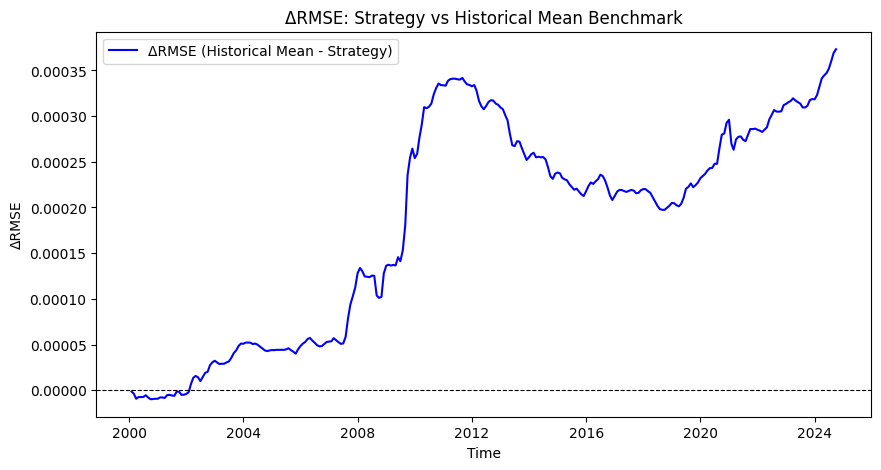

In [52]:
# **绘制 ΔRMSE**

plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


#### (In use)Below is using the variables that proofed Useful by LASSO and perform a time-series forecasting using Random Forest

In [53]:
import platform
import sys

print("Python executable:", sys.executable)
print("Architecture:", platform.architecture())

Python executable: /usr/local/bin/python
Architecture: ('64bit', '')


In [54]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

Processing: 100%|██████████| 567/567 [00:35<00:00, 16.01it/s]


      Metric     Value
0  R-squared  0.689870
1        MSE  0.002448
2       RMSE  0.049475


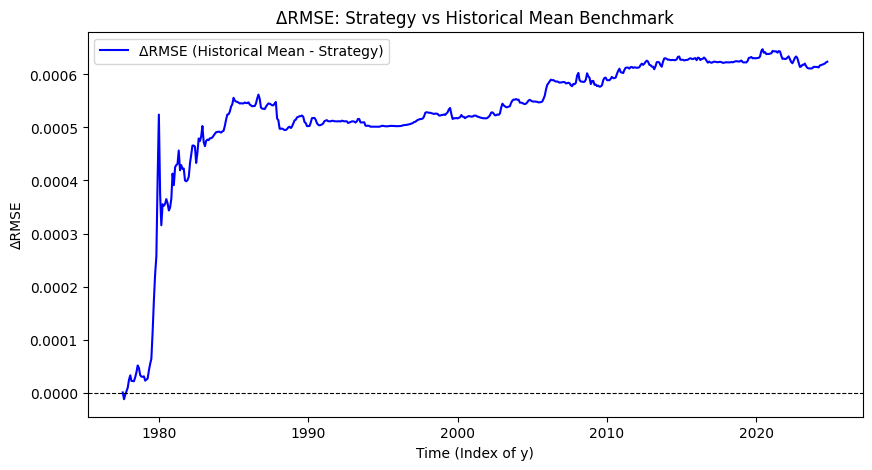

In [55]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 30  # 初始训练数据量
n_obs = len(y)
data_period=3
sign_threshold = 0.90  # 阈值：90% 以上的时间步符号一致
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []
# 存储模型的统计结果
model_summaries = []
for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * data_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Time Index": y.index[t],
        "y_test": float(y_test),
        "y_pred": float(y_pred),
        "historical_mean_error": y_historical_mean.mean() * data_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

"""
# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)
"""

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

"""
# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}


# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)
"""


# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


In [56]:
df_feature_avg_importance

,Feature,Avg Importance
0,SPX Index,0.092097
1,CPI YOY Index,0.161830
2,GDP_Nominoal_YOY,0.156010
3,GDP_Real_QoQ,0.101854
4,CPI_YoY,0.177306
5,US_Unemp,0.154011
6,US_RIR,0.156892


In [57]:
results=pd.DataFrame(results)
# 设置时间索引
results.set_index("Time Index", inplace=True)
results.index.name = "Date"
results

,y_test,y_pred,historical_mean_error
Date,,,
1977-07-31,0.073809,-0.017937,-0.019833
1977-08-31,0.114485,-0.064874,-0.018187
1977-09-30,0.088033,0.050915,-0.016591
1977-10-31,0.081335,0.048273,-0.011320
1977-11-30,0.081979,0.070976,-0.006481
...,...,...,...
2024-05-31,0.052281,0.032853,0.013057
2024-06-30,0.075273,0.020269,0.013079
2024-07-31,0.119321,0.019454,0.013093


In [58]:
results

,y_test,y_pred,historical_mean_error
Date,,,
1977-07-31,0.073809,-0.017937,-0.019833
1977-08-31,0.114485,-0.064874,-0.018187
1977-09-30,0.088033,0.050915,-0.016591
1977-10-31,0.081335,0.048273,-0.011320
1977-11-30,0.081979,0.070976,-0.006481
...,...,...,...
2024-05-31,0.052281,0.032853,0.013057
2024-06-30,0.075273,0.020269,0.013079
2024-07-31,0.119321,0.019454,0.013093


#### Alfred Redo with fewer parameters

In [59]:
selected_features_2 = ['SPX Index',
 'CPI YOY Index',
 'GDP_Nominoal_YOY',
 'GDP_Real_QoQ',
 'US_Unemp',
 'US_RIR']

 # select one between 'GDP_Real_QoQ' or 'GDP_Nominoal_YOY'

Processing: 100%|██████████| 567/567 [00:31<00:00, 18.02it/s]


      Metric     Value
0  R-squared  0.692705
1        MSE  0.002425
2       RMSE  0.049248


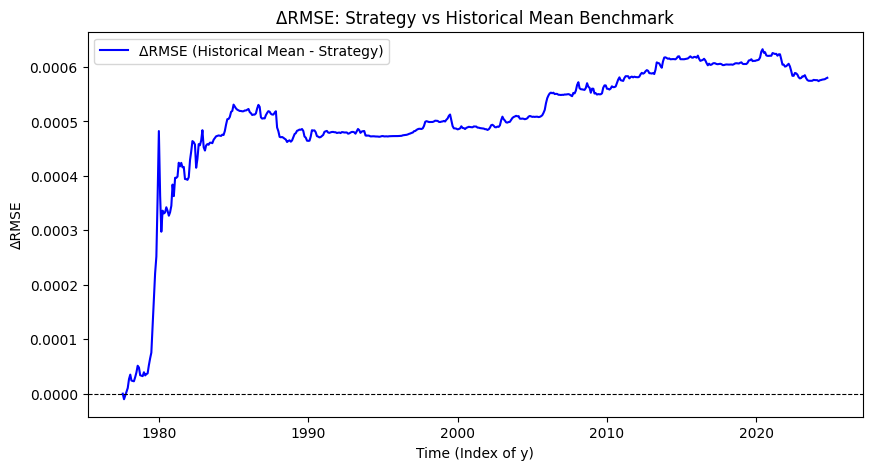

In [60]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 30  # 初始训练数据量
n_obs = len(y)
sign_threshold = 0.90  # 阈值：90% 以上的时间步符号一致
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost

#Use Random Forest for Prediction
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林


# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []
# 存储模型的统计结果
model_summaries = []

for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features_2]
        X_test_selected = X_test[selected_features_2]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * data_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Time Index": y.index[t],
        "y_test": float(y_test),
        "y_pred": float(y_pred),
        "historical_mean_error": y_historical_mean.mean() * data_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


In [61]:
model_summary

{'Model': 'RandomForestRegressor',
 'R-squared': 0.6927053418129374,
 'MSE': 0.002425383851860802,
 'RMSE': np.float64(0.04924818627991088),
 'Feature Importance': {'SPX Index': np.float64(0.11341017130501463),
  'CPI YOY Index': np.float64(0.2514963184218875),
  'GDP_Nominoal_YOY': np.float64(0.17826703015061288),
  'GDP_Real_QoQ': np.float64(0.15052028154897887),
  'US_Unemp': np.float64(0.15412853671459997),
  'US_RIR': np.float64(0.15217766185890624)}}

In [62]:
results

,Time Index,y_test,y_pred,historical_mean_error
0,1977-07-31,0.073809,-0.019241,-0.019833
1,1977-08-31,0.114485,-0.056322,-0.018187
2,1977-09-30,0.088033,0.028753,-0.016591
3,1977-10-31,0.081335,0.061891,-0.011320
4,1977-11-30,0.081979,0.069974,-0.006481
...,...,...,...,...
562,2024-05-31,0.052281,0.026441,0.013057
563,2024-06-30,0.075273,0.017272,0.013079
564,2024-07-31,0.119321,0.014871,0.013093
565,2024-08-31,0.124896,0.021023,0.013255


## <font color="yellow">Time Series Momentum Strategy</font>

#### Step 0: Continue from Time Series Dataframe in Previous Work

In [64]:
#View Gold price futures data
gc_data
gc_data.to_csv("gc_data_raw.csv")

#gc_data.columns

#### Step 1: Modify Dataframe

##### <font color= #90EE90> 1.1: Formulate Next Month (Actual) Sharpe Ratio </font> 

In [65]:
#Create new copy specifically for time series moementum strategy
gc_data.rename(columns={'GC1_volatility':'GC1_vol_annualized','GC2_volatility':'GC2_vol_annualized'},inplace=True)
gc_data_new = gc_data.copy()

#Calculate Actual Sharpe Ratio - Monthly
gc_data_new['GC1_vol_monthly'] = gc_data_new['GC1_vol_annualized']/ np.sqrt(12)
gc_data_new['GC2_vol_monthly'] = gc_data_new['GC2_vol_annualized']/ np.sqrt(12)

#Produce 1 Month historical and forward (actual) Sharpe Ratio
gc_data_new.rename(columns={'GC1_sharpe':'GC1_sharpe_1M_Hist','GC2_sharpe':'GC2_sharpe_1M_Hist'},inplace=True)
gc_data_new['GC1_sharpe_1M_Hist'] = gc_data_new['GC1_Monthly_Return']/gc_data_new['GC1_vol_monthly']
gc_data_new['GC2_sharpe_1M_Hist'] = gc_data_new['GC2_Monthly_Return']/gc_data_new['GC2_vol_monthly']
gc_data_new['GC1_sharpe_1M_RetHist_VolLag1'] = gc_data_new['GC1_Monthly_Return']/gc_data_new['GC1_vol_monthly'].shift(1)
gc_data_new['GC2_sharpe_1M_RetHist_VolLag1'] = gc_data_new['GC2_Monthly_Return']/gc_data_new['GC2_vol_monthly'].shift(1)

gc_data_new['GC1_sharpe_1M_Fwd'] = gc_data_new['GC1_sharpe_1M_Hist'].shift(1)
gc_data_new['GC2_sharpe_1M_Fwd'] = gc_data_new['GC2_sharpe_1M_Hist'].shift(1)

#Export CSV
gc_data_new.to_csv("gc_data_v1.csv")
gc_data_new




,GC1_Monthly_Return,GC2_Monthly_Return,GC1_vol_annualized,GC2_vol_annualized,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,GC1_12M_Fwd_Sign,GC1_OPEN_INT,GC1_sharpe_1M_Hist,GC2_sharpe_1M_Hist,GC1_vol_monthly,GC2_vol_monthly,GC1_sharpe_1M_RetHist_VolLag1,GC2_sharpe_1M_RetHist_VolLag1,GC1_sharpe_1M_Fwd,GC2_sharpe_1M_Fwd
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.041847,0.043425,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,-0.032772,-0.035034,0.162229,0.161182,NaN,-1.0,-1.0,0.007269,0.011357,1.0,...,-1.0,NaN,-0.699778,-0.752940,0.046831,0.046529,NaN,NaN,NaN,NaN
1975-04-30,-0.059919,-0.060868,0.171430,0.172165,NaN,-1.0,-1.0,-0.052477,-0.050844,-1.0,...,-1.0,NaN,-1.210788,-1.224726,0.049488,0.049700,-1.279464,-1.308176,-0.699778,-0.752940
1975-05-31,-0.001800,0.000592,0.176185,0.181025,NaN,1.0,-1.0,-0.095310,-0.094491,-1.0,...,-1.0,NaN,-0.035395,0.011326,0.050860,0.052257,-0.036377,0.011909,-1.210788,-1.224726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.168238,0.169387,2.030054,1.0,1.0,0.074644,0.075273,1.0,...,NaN,1.334165,0.651465,0.643546,0.048566,0.048898,0.624646,0.612818,0.720016,0.702671
2024-09-30,0.051211,0.050830,0.151431,0.154221,0.095934,1.0,1.0,0.118380,0.119321,1.0,...,NaN,-2.773346,1.171506,1.141747,0.043714,0.044520,1.054467,1.039522,0.651465,0.643546
2024-10-31,0.042046,0.042190,0.134111,0.135932,-1.598552,1.0,1.0,0.124488,0.124896,1.0,...,NaN,5.034246,1.086047,1.075170,0.038715,0.039240,0.961833,0.947664,1.171506,1.141747


##### <font color= #90EE90> 1.2: Shift 1 month for 3M, 6M, 12M Return Sign  </font> 

In [68]:
shift_columns_gc_all = ["GC1_1M_Sign","GC2_1M_Sign",'GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']
shift_columns_gc2= ["GC2_1M_Sign",'GC2_3M_Sign','GC2_6M_Sign','GC2_12M_Sign']
shift_col_exp_1M = ['GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']

for col in shift_columns_gc_all:
    x_variables_data[col+'_lag_1']=gc_data_new[col].shift(1)

for col in shift_col_exp_1M:
    x_variables_data[col+'_lag_2']=gc_data_new[col].shift(2)

x_variables_data.to_csv("gc_data_v2_20250215.csv")
x_variables_data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,GC1_6M_Sign_lag_1,GC2_6M_Sign_lag_1,GC1_12M_Sign_lag_1,GC2_12M_Sign_lag_1,GC1_3M_Sign_lag_2,GC2_3M_Sign_lag_2,GC1_6M_Sign_lag_2,GC2_6M_Sign_lag_2,GC1_12M_Sign_lag_2,GC2_12M_Sign_lag_2
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-30,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-05-31,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.003152,-0.033085,-0.017191,-0.083178,-0.088641,0.291765,-0.073755,0.031744,0.023840,0.008580,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-09-30,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-31,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Step 2: Create Train-Calibrate-Test Split Dataset

##### <font color= #90EE90> _2.1: Separate dataframes_ </font> 

In [37]:
# GC2_Features = ['GC2_1M_Sign_lag_1','GC2_3M_Sign_lag_1','GC2_6M_Sign_lag_1','GC2_12M_Sign_lag_1']
# GC1_Features = ['GC1_1M_Sign_lag_1','GC1_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC1_12M_Sign_lag_1']
# 
# #gc2 only
# xy_tsm = gc_data_new[['GC2_sharpe_1M_Hist']+ ['GC2_sharpe_1M_Fwd'] + ['GC2_sharpe_1M_RetHist_VolLag1'] + GC2_Features].dropna(how='any')
# 
# y_tsm = pd.DataFrame()
# 
# y_tsm['GC2_sharpe_1M_RetT_VolT-1'] = xy_tsm['GC2_sharpe_1M_RetHist_VolLag1']
# x_tsm = xy_tsm[[col for col in GC2_Features]]
# 
# #checking
# #x_tsm
# 
# y_tsm.to_csv("y_tsm.csv")
# 
# y_tsm
# 
# #xy_tsm


##### <font color= #90EE90> _2.2: Define Cross Validation Fold_ </font> 

Method: Rolling folds that trains every month

In [69]:
train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period

calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 

test_date = calib_end + pd.DateOffset(months=1)


#### Step 3: Train Model

In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm


##### **Test Code (1 iteration)**

In [40]:
"""
#Design rolling loop algorithm

results = []

#while test_date <= pd.Timestamp('2010-12-31'):
    
#create train dataset
x_tsm_train = x_tsm.loc[:train_end]
y_tsm_train = y_tsm.loc[:train_end]

#create calibration dataset
x_tsm_calib = x_tsm.loc[calib_start:calib_end]
y_tsm_calib = y_tsm.loc[calib_start:calib_end]

#test data
x_tsm_test = x_tsm.loc[test_date:test_date]

#define alpha and error before loop
best_alpha = None
least_error = np.inf

#checking
x_tsm_train

"""

"\n#Design rolling loop algorithm\n\nresults = []\n\n#while test_date <= pd.Timestamp('2010-12-31'):\n    \n#create train dataset\nx_tsm_train = x_tsm.loc[:train_end]\ny_tsm_train = y_tsm.loc[:train_end]\n\n#create calibration dataset\nx_tsm_calib = x_tsm.loc[calib_start:calib_end]\ny_tsm_calib = y_tsm.loc[calib_start:calib_end]\n\n#test data\nx_tsm_test = x_tsm.loc[test_date:test_date]\n\n#define alpha and error before loop\nbest_alpha = None\nleast_error = np.inf\n\n#checking\nx_tsm_train\n\n"

In [41]:
"""
for a in alphas:
    if regression_type == 'ridge':
        candidate_model = Ridge(alpha= a)
    else: #assume lasso
        candidate_model = Lasso(alpha= a, max_iter=2000)
        
#fit the model in the calibration set
candidate_model.fit(x_tsm_train, y_tsm_train)
y_tsm_pred = candidate_model.predict(x_tsm_calib)
error = mean_squared_error(y_tsm_calib,y_tsm_pred)

if error < least_error:
    least_error = error
    best_alpha = a

#combine training and calibration set
x_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])
y_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])

#train the final model with the best alpha over training + calibration timeframe
if regression_type == 'ridge':
    final_model = Ridge(alpha= best_alpha)
else: #assume lasso
    final_model = Lasso(alpha= best_alpha, max_iter=2000)

final_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)


#forecasting the test month
forecast = final_model.predict(x_tsm_test)[0]
realized = x_tsm_test.iloc[0,0]

#iteration results
results.append({
    'train_end': train_end,
    'calib_start': calib_start,
    'calib_end': calib_end,
    'test_date': test_date,
    'best_alpha': best_alpha,
    'forecast': forecast,
    'realized': realized,
    'calib_error': least_error
})

#expand the windows for next interation
#train - calibrate - test split
train_end = train_end + pd.DateOffset(months=1) #Expand 1 month
calib_start = calib_start + pd.DateOffset(months=1)  #Slide 1 month
calib_end = test_date                              #Slide 1 month (i.e. previous test date)
test_date = test_date + pd.DateOffset(months=1) #Slide to next month for prediction
    
#results_df = pd.DataFrame(results)

results
"""

"\nfor a in alphas:\n    if regression_type == 'ridge':\n        candidate_model = Ridge(alpha= a)\n    else: #assume lasso\n        candidate_model = Lasso(alpha= a, max_iter=2000)\n        \n#fit the model in the calibration set\ncandidate_model.fit(x_tsm_train, y_tsm_train)\ny_tsm_pred = candidate_model.predict(x_tsm_calib)\nerror = mean_squared_error(y_tsm_calib,y_tsm_pred)\n\nif error < least_error:\n    least_error = error\n    best_alpha = a\n\n#combine training and calibration set\nx_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])\ny_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])\n\n#train the final model with the best alpha over training + calibration timeframe\nif regression_type == 'ridge':\n    final_model = Ridge(alpha= best_alpha)\nelse: #assume lasso\n    final_model = Lasso(alpha= best_alpha, max_iter=2000)\n\nfinal_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)\n\n\n#forecasting the test month\nforecast = final_model.predict(x_tsm_test)[

##### **While-Loop Iteration**

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm

train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period
calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 
test_date = calib_end + pd.DateOffset(months=1)

regression_type = 'lasso'
alphas = np.logspace(4,-4,100).tolist()
#alphas

In [44]:
#Design rolling loop algorithm
GC2_Features = ['GC2_1M_Sign_lag_1','GC2_3M_Sign_lag_1','GC2_6M_Sign_lag_1','GC2_12M_Sign_lag_1']
GC1_Features = ['GC1_1M_Sign_lag_1','GC1_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC1_12M_Sign_lag_1']
results = []
y_tsm=pd.DataFrame(gc_data_new["GC2_sharpe_1M_RetHist_VolLag1"].dropna(how="all"))
x_tsm = x_variables_data[[col for col in GC2_Features]].fillna(0).copy().loc[y_tsm.index]
#apply tqdm for manual progress bar
pbar = tqdm(total=y_tsm.loc[test_date:].shape[0], desc="Rolling Window Iterations")
i=1

while test_date <= y_tsm.index[-1]:
    
    """
    print(f"\n\n--------\nIteration {i} starts....")
    print("Current training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    
    #create train dataset
    x_tsm_train = x_tsm.loc[:train_end]
    y_tsm_train = y_tsm.loc[:train_end]

    #create calibration dataset
    x_tsm_calib = x_tsm.loc[calib_start:calib_end]
    y_tsm_calib = y_tsm.loc[calib_start:calib_end]

    #test data
    x_tsm_test = x_tsm.loc[test_date:test_date]
    y_tsm_test = y_tsm.loc[test_date:test_date]

    #define alpha and error before loop
    best_alpha = None
    least_error = np.inf

    #checking
    x_tsm_train

    for a in alphas:
        if regression_type == 'ridge':
            candidate_model = Ridge(alpha= a)
        else: #assume lasso
            candidate_model = Lasso(alpha= a, max_iter=1000)
            
        #fit the model in the calibration set
        candidate_model.fit(x_tsm_train, y_tsm_train)
        y_tsm_pred = candidate_model.predict(x_tsm_calib)
        error = mean_squared_error(y_tsm_calib,y_tsm_pred)

        if error < least_error:
            least_error = error
            best_alpha = a

    #combine training and calibration set
    x_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])
    y_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])

    #train the final model with the best alpha over training + calibration timeframe
    if regression_type == 'ridge':
        final_model = Ridge(alpha= best_alpha)
    else: #assume lasso
        final_model = Lasso(alpha= best_alpha, max_iter=1000)

    final_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)
    #forecasting the test month
    forecast = final_model.predict(x_tsm_test)[0]
    realized = y_tsm_test.iloc[0,0]

    #iteration results
    results.append({
        'train_end': train_end,
        'calib_start': calib_start,
        'calib_end': calib_end,
        'test_date': test_date,
        'best_alpha': best_alpha,
        'forecast': forecast,
        'realized': realized,
        'calib_error': least_error
    })

    #expand the windows for next interation
    #train - calibrate - test split
    train_end = train_end + pd.offsets.MonthEnd(1) #Expand 1 month
    calib_start = calib_start + pd.offsets.MonthEnd(1)  #Slide 1 month
    calib_end = test_date                              #Slide 1 month (i.e. previous test date)
    test_date = test_date + pd.offsets.MonthEnd(1) #Slide to next month for prediction
    
    """
    print("\nNext training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    i = i+1
    pbar.set_description(f"Rolling Window Iterations: {i}/{y_tsm.loc[test_date:].shape[0]}")
    pbar.update(1)

pbar.close()

results_df = pd.DataFrame(results)
results_df

Rolling Window Iterations: 12/337:   3%|▎         | 11/348 [00:02<01:20,  4.17it/s]

KeyboardInterrupt: 

##### **Model Results**

In [45]:
#results_df.to_excel("results_df_lasso1.xlsx")
results_df

NameError: name 'results_df' is not defined

#### Step 4: Evaluate Model

In [46]:
y_tsm

,GC2_sharpe_1M_RetHist_VolLag1
Date,
1975-04-30,-1.308176
1975-05-31,0.011909
1975-06-30,0.157870
1975-07-31,0.011894
1975-08-31,-1.002974
...,...
2024-08-31,0.612818
2024-09-30,1.039522
2024-10-31,0.947664


##### **Calculate Historical Mean**

In [47]:
#calcualte historical expanding mean
y_tsm_with_mean = y_tsm.copy()
y_tsm_with_mean['hist_mean_expand'] = y_tsm_with_mean['GC2_sharpe_1M_RetHist_VolLag1'].expanding(min_periods=1).mean()

#include historical expanding mean in results df
results_df_2 = results_df.copy()
results_df_2 = results_df_2.set_index('test_date')
results_df_2 = results_df_2.join(y_tsm_with_mean['hist_mean_expand'], how='left')

results_df_2

NameError: name 'results_df' is not defined

##### **Generate Evalution Statistics**

In [48]:
#calculate RMSE, RMSE diff, cummulative RMSE diff, OOS R-Sq Stat

#SSE
results_df_2['SSE_forecast'] = (results_df_2['realized'] - results_df_2['forecast'])**2
results_df_2['SSE_hist'] = (results_df_2['realized'] - results_df_2['hist_mean_expand'])**2
# results_df_2['row_num'] = np.arange(1,len(results_df_2)+1)
num_of_rows=len(results_df_2)
#Cummulative SSE
results_df_2['Cum_SSE_forecast'] = results_df_2['SSE_forecast'].expanding(min_periods=1).sum()
results_df_2['Cum_SSE_hist'] = results_df_2['SSE_hist'].expanding(min_periods=1).sum()

#RMSE
results_df_2['RMSE_forecast'] = np.sqrt(results_df_2['SSE_forecast']/num_of_rows)
results_df_2['RMSE_hist'] = np.sqrt(results_df_2['SSE_hist']/num_of_rows)

#RMSE diff and cummulaitve RMSE diff
results_df_2['RMSE_diff'] = results_df_2['RMSE_hist'] - results_df_2['RMSE_forecast']
results_df_2['Cum_RMSE_diff'] = results_df_2['RMSE_diff'].expanding(min_periods=1).sum()

#OOS R-Sq Stat
results_df_2['R_Sq_OOS'] = 1 - (results_df_2['Cum_SSE_forecast']/ results_df_2['Cum_SSE_hist'])

results_df_2.to_csv("results_df_2_lasso1_20250213.csv")
results_df_2



NameError: name 'results_df_2' is not defined

##### **Plot Results**

In [49]:
import matplotlib.pyplot as plt

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(results_df_2.index, results_df_2['Cum_RMSE_diff'], label="OOS ΔRMSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")
plt.ylabel("OOS ΔRMSE")
plt.title("Out-of-Sample ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()

NameError: name 'results_df_2' is not defined

<Figure size 1000x500 with 0 Axes>

-----------

#### Placeholder: Below is experiment code on random forest with CALIBRATION, doesn't have good performance yet

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.isotonic import IsotonicRegression  # 替换 Logistic Regression

# **Expanding Window 回归**
start_train = 100  # 初始训练数据量
y=pd.DataFrame(gc_data_new["GC2_sharpe_1M_RetHist_VolLag1"].dropna(how="all"))
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept
y_historical_mean_data=gc_data['GC1_Monthly_Return'].dropna(how='all')
# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
n_obs = len(y)

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []

# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归

# Isotonic Regression 校准模型
calibration_model = IsotonicRegression(out_of_bounds='clip')

for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # **划分训练集（80%）、校准集（20%）**
    split_idx = int(0.8 * t)  # 80% 作为训练集，20% 作为校准集
    X_train = X_scaled.iloc[:split_idx]
    y_train = y.iloc[:split_idx]

    X_calib = X_scaled.iloc[split_idx:t]
    y_calib = y.iloc[split_idx:t]

    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]
    
    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_calib_selected = X_calib[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练回归模型
        model.fit(X_train_selected, y_train)

        # **校准步骤**
        y_calib_pred = model.predict(X_calib_selected)  # 获取校准集的预测值（scores）
        calibration_model.fit(y_calib_pred, y_calib)  # 训练 Isotonic Regression 进行校准

        # **在测试集上应用校准**
        y_pred_raw = model.predict(X_test_selected)  # 先用回归模型预测
        y_pred_calibrated = calibration_model.predict(y_pred_raw)  # 用 Isotonic Regression 进行校准
        
        forecast_error = float(y_test - y_pred_calibrated)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * data_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()




Processing:   0%|          | 0/496 [00:00<?, ?it/s]


ValueError: all keys need to be the same shape

--------------

### ** ---- Sicheng 20250214 ---- **

#### Sicheng's combined code is below

In [70]:
x_variables_data.to_excel("x_variables_data_20250214.xlsx")
x_variables_data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,GC1_6M_Sign_lag_1,GC2_6M_Sign_lag_1,GC1_12M_Sign_lag_1,GC2_12M_Sign_lag_1,GC1_3M_Sign_lag_2,GC2_3M_Sign_lag_2,GC1_6M_Sign_lag_2,GC2_6M_Sign_lag_2,GC1_12M_Sign_lag_2,GC2_12M_Sign_lag_2
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-30,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-05-31,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.003152,-0.033085,-0.017191,-0.083178,-0.088641,0.291765,-0.073755,0.031744,0.023840,0.008580,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-09-30,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-31,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 100  # 初始训练数据量
data_period=6
y=gc_data_new[f"GC1_{data_period}M_Fwd_Ret"].dropna(how="all")
y_historical_mean_data=gc_data_new['GC1_Monthly_Return'].loc[y.index].dropna(how='all')


#shift_columns_gc2 = ["GC2_1M_Sign_lag_1", "GC2_3M_Sign_lag_1", "GC2_6M_Sign_lag_1", "GC2_12M_Sign_lag_1"]
shift_columns_gc2 = ["GC2_1M_Sign_lag_1", "GC2_3M_Sign_lag_2", "GC2_6M_Sign_lag_2", "GC2_12M_Sign_lag_2"]
#shift_columns_gc_all = ["GC1_1M_Sign_lag_1","GC2_1M_Sign_lag_1",'GC1_3M_Sign_lag_1','GC2_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC2_6M_Sign_lag_1','GC1_12M_Sign_lag_1','GC2_12M_Sign_lag_1']
shift_columns_gc_all = ["GC1_1M_Sign_lag_1","GC2_1M_Sign_lag_1",'GC1_3M_Sign_lag_2','GC2_3M_Sign_lag_2','GC1_6M_Sign_lag_2','GC2_6M_Sign_lag_2','GC1_12M_Sign_lag_2','GC2_12M_Sign_lag_2']

cols_to_merge = ['GC1_Monthly_Return', 'GC1_3M_Ret', 'GC1_6M_Ret', 'GC1_12M_Ret']

# 合并数据，使用索引进行连接（inner join）

# let's try still using the sign first in another run 


x_variables_data = x_variables_data.drop(columns=shift_columns_gc_all, errors="ignore")
x_variables_data = x_variables_data.merge(gc_data_new[cols_to_merge].shift(1), left_index=True, right_index=True, how="left")

x_variables_data


,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,GC1_3M_Sign_lag_1,GC2_3M_Sign_lag_1,GC1_6M_Sign_lag_1,GC2_6M_Sign_lag_1,GC1_12M_Sign_lag_1,GC2_12M_Sign_lag_1,GC1_Monthly_Return,GC1_3M_Ret,GC1_6M_Ret,GC1_12M_Ret
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002282,NaN,NaN,NaN
1975-03-31,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.041847,NaN,NaN,NaN
1975-04-30,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,-0.032772,0.011357,NaN,NaN
1975-05-31,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,-1.0,-1.0,NaN,NaN,NaN,NaN,-0.059919,-0.050844,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.003152,-0.033085,-0.017191,-0.083178,-0.088641,0.291765,-0.073755,0.031744,0.023840,0.008580,...,1.0,1.0,1.0,1.0,1.0,1.0,0.036470,0.052281,0.169391,0.208163
2024-09-30,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,1.0,1.0,1.0,1.0,1.0,1.0,0.031639,0.075273,0.197959,0.251799
2024-10-31,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,1.0,1.0,1.0,1.0,1.0,1.0,0.051211,0.119321,0.172965,0.355143


In [ ]:

# # 确保合并前删除重复列
# x_variables_data = x_variables_data.drop(columns=cols_to_merge, errors="ignore")
# 
# # 进行合并，避免重复列报错
# x_variables_data = x_variables_data.merge(
#     gc_data_new[cols_to_merge].shift(1),
#     left_index=True,
#     right_index=True,
#     how="left",
#     suffixes=("_old", "_new")  # 避免 Pandas 默认的 "_x" 和 "_y" 造成冲突
# )

X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
n_obs = len(y)

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []

# 存储模型的统计结果
model_summaries = []
for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * data_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Date": y.index[t],
        "ret_real": float(y_test),
        "ret_pred": float(y_pred),
        "historical_mean": y_historical_mean.mean() * data_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


In [ ]:
results

In [ ]:
delta_RMSE_series

In [ ]:
results['ret_real']/data_period

In [60]:
results

,Date,ret_real,ret_pred,historical_mean,strategy_return,benchmark_return
0,1983-05-31,-0.134883,-0.019382,0.054392,0.018481,-0.026481
1,1983-06-30,-0.022087,0.064510,0.050832,-0.007681,-0.007681
2,1983-07-31,-0.075672,-0.001176,0.051254,0.008612,-0.016612
3,1983-08-31,-0.099242,0.045655,0.049958,-0.020540,-0.020540
4,1983-09-30,-0.046053,-0.019220,0.050158,0.003675,-0.011675
...,...,...,...,...,...,...
489,2024-02-29,0.169391,0.031960,0.025054,0.024232,0.024232
490,2024-03-31,0.197959,0.054515,0.025043,0.028993,0.028993
491,2024-04-30,0.172965,0.046533,0.025774,0.024828,0.024828
492,2024-05-31,0.177177,0.053097,0.026114,0.025530,0.025530


#### WIP: Below is the code to compare strategy performance, it's not good to use yet, has some bugs

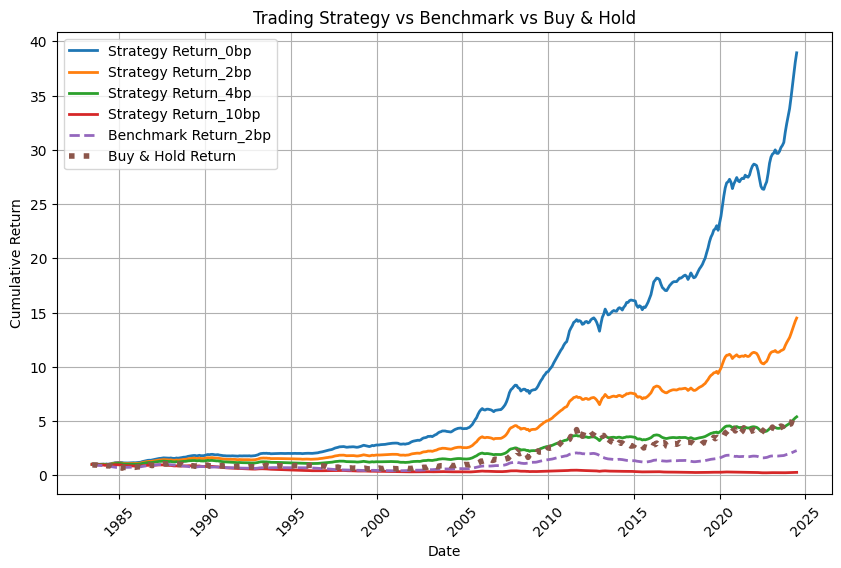

In [66]:
transaction_cost=[0,0.002,0.004,0.01]
benchmark_bp=0.002
results=pd.DataFrame(results)
# 设置时间索引
results.set_index("Date", inplace=True)
for tc in transaction_cost:
    # 计算策略回报
    results[f"strategy_return_{int(tc*1000)}bp"] = results["ret_real"]/data_period * results["ret_pred"].apply(lambda x: 1 if x > 0 else -1)-tc
    results[f"cumulative_strategy_{int(tc*1000)}bp"] = np.exp(results[f"strategy_return_{int(tc*1000)}bp"].cumsum())


# 计算基准回报
results["benchmark_return"] = results["ret_real"]/data_period * results["historical_mean"].apply(lambda x: 1 if x > 0 else -1)-benchmark_bp

# 计算买入持有回报
results["buy_and_hold_return"] = gc_data_new["GC1_Monthly_Return"].loc[results.index]

# 计算累积收益
results["cumulative_benchmark"] = np.exp(results["benchmark_return"].cumsum())
results["cumulative_buy_and_hold"] = np.exp(results["buy_and_hold_return"].cumsum())

# 绘制收益曲线
plt.figure(figsize=(10, 6))
for tc in transaction_cost:
    plt.plot(results.index, results[f"cumulative_strategy_{int(tc*1000)}bp"], label=f"Strategy Return_{int(tc*1000)}bp", linewidth=2)
plt.plot(results.index, results["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*1000)}bp", linestyle="--", linewidth=2)
plt.plot(results.index, results["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Trading Strategy vs Benchmark vs Buy & Hold (no short constraint)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
# print(performance_metrics)

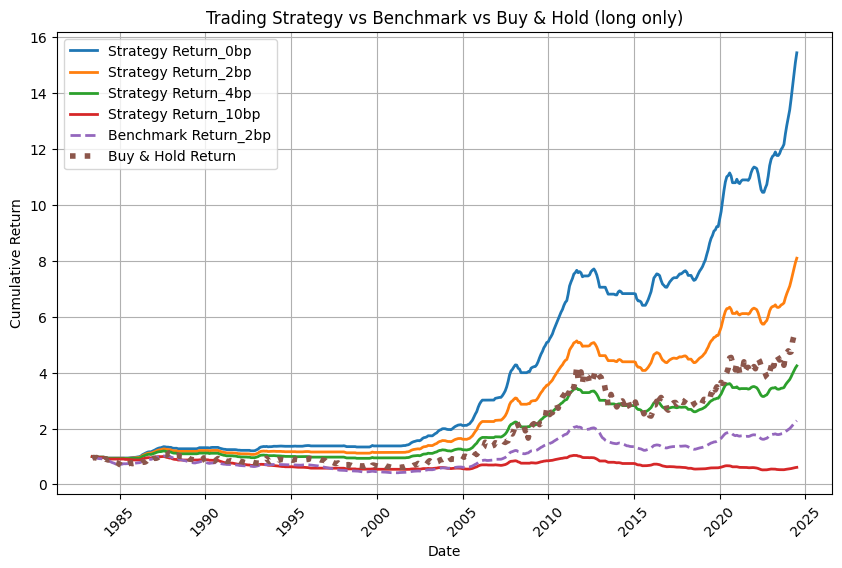

In [73]:
transaction_cost=[0,0.002,0.004,0.01]
benchmark_bp=0.002
results=pd.DataFrame(results)
# 设置时间索引
#results.set_index("Date", inplace=True)
for tc in transaction_cost:
    # 计算策略回报
    results[f"strategy_return_{int(tc*1000)}bp"] = (results["ret_real"]/data_period * results["ret_pred"].apply(lambda x: 1 if x > 0 else 0)).apply(lambda x:x-tc if x!=0 else x)
    results[f"cumulative_strategy_{int(tc*1000)}bp"] = np.exp(results[f"strategy_return_{int(tc*1000)}bp"].cumsum())


# 计算基准回报
results["benchmark_return"] = results["ret_real"]/data_period * results["historical_mean"].apply(lambda x: 1 if x > 0 else -1)-benchmark_bp

# 计算买入持有回报
results["buy_and_hold_return"] = gc_data_new["GC1_Monthly_Return"].loc[results.index]

# 计算累积收益
results["cumulative_benchmark"] = np.exp(results["benchmark_return"].cumsum())
results["cumulative_buy_and_hold"] = np.exp(results["buy_and_hold_return"].cumsum())


# 绘制收益曲线
plt.figure(figsize=(10, 6))
for tc in transaction_cost:
    plt.plot(results.index, results[f"cumulative_strategy_{int(tc*1000)}bp"], label=f"Strategy Return_{int(tc*1000)}bp", linewidth=2)
plt.plot(results.index, results["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*1000)}bp", linestyle="--", linewidth=2)
plt.plot(results.index, results["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Trading Strategy vs Benchmark vs Buy & Hold (long only)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
# print(performance_metrics)

In [76]:
# 计算指标
performance_metrics = []

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    """ 计算夏普率 """
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else np.nan

def calculate_max_drawdown(cumulative_returns):
    """ 计算最大回撤 """
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

for tc in transaction_cost:
    col_name_return = f"strategy_return_{int(tc*1000)}bp"
    col_name_cum = f"cumulative_strategy_{int(tc*1000)}bp"

    final_net_value = results[col_name_cum].iloc[-1]
    annualized_return = results[col_name_return].mean() * 12
    sharpe_ratio = calculate_sharpe_ratio(results[col_name_return])
    max_drawdown = calculate_max_drawdown(results[col_name_cum])
    
    performance_metrics.append(["Strategy", f"{int(tc*1000)}bp", final_net_value, annualized_return, sharpe_ratio, max_drawdown])

# 计算基准策略的绩效
final_net_value_benchmark = results["cumulative_benchmark"].iloc[-1]
annualized_return_benchmark = results["benchmark_return"].mean() * 12
sharpe_ratio_benchmark = calculate_sharpe_ratio(results["benchmark_return"])
max_drawdown_benchmark = calculate_max_drawdown(results["cumulative_benchmark"])
performance_metrics.append(["Benchmark", f"{int(benchmark_bp*1000)}bp", final_net_value_benchmark, annualized_return_benchmark, sharpe_ratio_benchmark, max_drawdown_benchmark])

# 计算买入持有策略的绩效
final_net_value_bh = results["cumulative_buy_and_hold"].iloc[-1]
annualized_return_bh = results["buy_and_hold_return"].mean() * 12
sharpe_ratio_bh = calculate_sharpe_ratio(results["buy_and_hold_return"])
max_drawdown_bh = calculate_max_drawdown(results["cumulative_buy_and_hold"])
performance_metrics.append(["Buy & Hold", "-", final_net_value_bh, annualized_return_bh, sharpe_ratio_bh, max_drawdown_bh])

# 创建结果 DataFrame
performance_df = pd.DataFrame(performance_metrics, columns=["Strategy", "Transaction Cost", "Final Net Value", "Annualized Return", "Sharpe Ratio", "Max Drawdown"])


In [77]:
performance_df

,Strategy,Transaction Cost,Final Net Value,Annualized Return,Sharpe Ratio,Max Drawdown
0,Strategy,0bp,15.444434,0.066492,0.416894,-0.168626
1,Strategy,2bp,8.095017,0.050800,0.324800,-0.205820
2,Strategy,4bp,4.242907,0.035107,0.227822,-0.246062
3,Strategy,10bp,0.610943,-0.011970,-0.078638,-0.499197
4,Benchmark,2bp,2.280882,0.020030,0.103926,-0.592273
5,Buy & Hold,-,5.397001,0.040952,0.078546,-0.477189
